# 导入包

In [1]:
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_squared_error

import lightgbm as lgb

# 加载数据，对数据进行基本处理

In [2]:
iris = load_iris()

In [3]:
x_train, x_val, y_train, y_val = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
x_train.shape, x_val.shape

((120, 4), (30, 4))

<AxesSubplot: ylabel='count'>

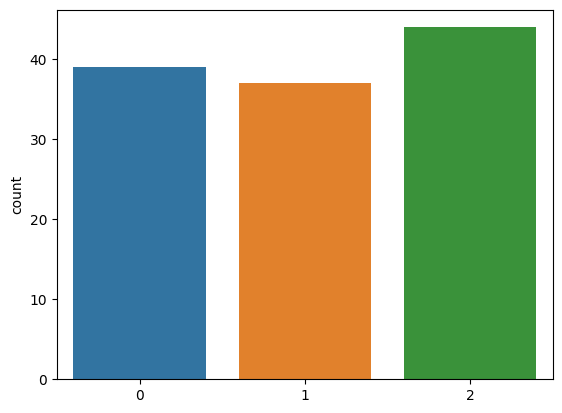

In [4]:
sns.countplot(x=y_train)

# 模型训练

## 回归模型 LGBMRegressor

In [8]:
lgbmr = lgb.LGBMRegressor(objective="regression", learning_rate=0.05, n_estimators=20)

In [9]:
lgbmr.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric="l1", callbacks=[lgb.early_stopping(5)])

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's l1: 0.260711	valid_0's l2: 0.101377


LGBMRegressor(learning_rate=0.05, n_estimators=20, objective='regression')

In [ ]:
lgbmr.score(x_val, y_val)

0.8118770336882779

## 分类模型 LGBMClassifier

In [17]:
lgbmc = lgb.LGBMClassifier(objective="multiclass", learning_rate=0.05, n_estimators=20)

In [18]:
lgbmc.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric="logloss", callbacks=[lgb.early_stopping(5)])

Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[20]	valid_0's multi_logloss: 0.299941


LGBMClassifier(learning_rate=0.05, n_estimators=20, objective='multiclass')

In [19]:
lgbmc.score(x_val, y_val)

1.0

# 网格搜索 GridSearchCV

In [20]:
lgbmc_gs = lgb.LGBMClassifier()

In [21]:
param_grid = {
    "learning_rate": [0.01, 0.1, 1],
    "n_estimators": range(10, 101, 10),
}

In [22]:
gs = GridSearchCV(lgbmc_gs, param_grid, cv=4)

In [23]:
gs.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': range(10, 101, 10)})

In [24]:
gs.score(x_val, y_val)

1.0

In [25]:
# 获取最好的参数,参数从parma_grid中找
print('Best parameters found by grid search are:', gs.best_params_)

Best parameters found by grid search are: {'learning_rate': 0.1, 'n_estimators': 80}


# 确定最好模型

In [27]:
best_lgbmc = lgb.LGBMClassifier(learning_rate=0.1, n_estimators=80)

In [28]:
best_lgbmc.fit(x_train, y_train, eval_set=[(x_val, y_val)], eval_metric='logloss', callbacks=[lgb.early_stopping(5)])

Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[65]	valid_0's multi_logloss: 0.0258881


LGBMClassifier(n_estimators=80)

In [30]:
best_lgbmc.score(x_val, y_val)

1.0